# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [2]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.6.0'

#### Load Image Data

In [20]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0005 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


# Model 1: VGG16

#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [5]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False
model = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [8]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

    
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size



res = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, \
          validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

22
6


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 15s 679ms/step - loss: 2.2291 - categorical_accuracy: 0.3641 - val_loss: 1.0474 - val_categorical_accuracy: 0.5200
Epoch 2/100
21/21 [==============================] - 13s 627ms/step - loss: 1.2767 - categorical_accuracy: 0.5049 - val_loss: 0.9806 - val_categorical_accuracy: 0.6400
Epoch 3/100
21/21 [==============================] - 13s 630ms/step - loss: 1.2193 - categorical_accuracy: 0.5388 - val_loss: 1.4163 - val_categorical_accuracy: 0.5600
Epoch 4/100
21/21 [==============================] - 13s 627ms/step - loss: 1.2170 - categorical_accuracy: 0.5485 - val_loss: 1.2122 - val_categorical_accuracy: 0.5800
Epoch 5/100
21/21 [==============================] - 13s 633ms/step - loss: 1.0722 - categorical_accuracy: 0.5922 - val_loss: 1.0407 - val_categorical_accuracy: 0.4800
Epoch 6/100
21/21 [==============================] - 13s 630ms/step - loss: 1.0387 - categorical_accuracy: 0.5922 - val_loss: 0.9112 - val_categorical_accuracy:

21/21 [==============================] - 14s 679ms/step - loss: 0.5212 - categorical_accuracy: 0.7767 - val_loss: 0.5557 - val_categorical_accuracy: 0.7400
Epoch 50/100
21/21 [==============================] - 14s 680ms/step - loss: 0.5532 - categorical_accuracy: 0.7913 - val_loss: 0.7965 - val_categorical_accuracy: 0.6400
Epoch 51/100
21/21 [==============================] - 14s 679ms/step - loss: 0.6079 - categorical_accuracy: 0.7330 - val_loss: 0.8610 - val_categorical_accuracy: 0.6400
Epoch 52/100
21/21 [==============================] - 14s 673ms/step - loss: 0.5460 - categorical_accuracy: 0.7718 - val_loss: 0.9379 - val_categorical_accuracy: 0.6200
Epoch 53/100
21/21 [==============================] - 14s 675ms/step - loss: 0.6140 - categorical_accuracy: 0.7476 - val_loss: 0.8440 - val_categorical_accuracy: 0.6000
Epoch 54/100
21/21 [==============================] - 14s 676ms/step - loss: 0.5954 - categorical_accuracy: 0.7476 - val_loss: 0.6495 - val_categorical_accuracy: 0.7600

21/21 [==============================] - 14s 681ms/step - loss: 0.6235 - categorical_accuracy: 0.7136 - val_loss: 0.6121 - val_categorical_accuracy: 0.6400
Epoch 98/100
21/21 [==============================] - 14s 686ms/step - loss: 0.5301 - categorical_accuracy: 0.7573 - val_loss: 0.7294 - val_categorical_accuracy: 0.6000
Epoch 99/100
21/21 [==============================] - 14s 680ms/step - loss: 0.4741 - categorical_accuracy: 0.8058 - val_loss: 0.6275 - val_categorical_accuracy: 0.6800
Epoch 100/100
21/21 [==============================] - 14s 685ms/step - loss: 0.4540 - categorical_accuracy: 0.8252 - val_loss: 0.6081 - val_categorical_accuracy: 0.7000


#### [5 points] Plot Accuracy and Loss During Training

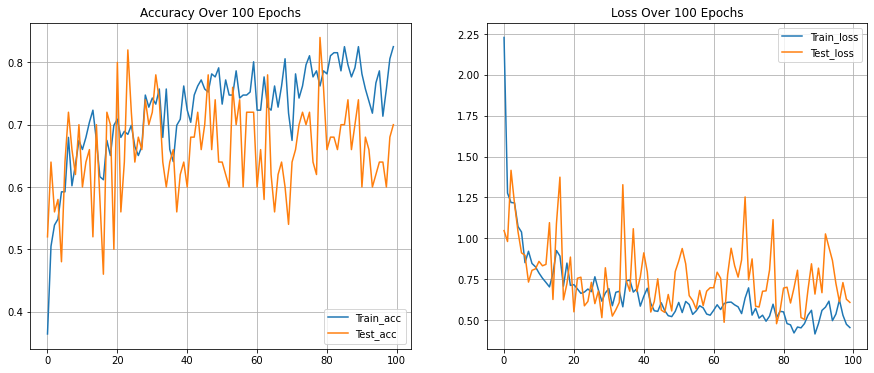

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1.plot(res.history['categorical_accuracy'])
ax1.plot(res.history['val_categorical_accuracy'])
ax1.set_title('Accuracy Over ' + str(NUM_EPOCHS) + ' Epochs')
ax1.legend(['Train_acc', 'Test_acc'], loc='lower right')
ax1.grid(True)
ax2.set_title('Loss Over ' + str(NUM_EPOCHS) + ' Epochs')
ax2.plot(res.history['loss'])
ax2.plot(res.history['val_loss'])
ax2.legend(['Train_loss', 'Test_loss'], loc='upper right')
ax2.grid(True)
plt.show()

#### Testing Model

In [10]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
 2/36 [>.............................] - ETA: 2s - loss: 3.9921 - categorical_accuracy: 0.5000    

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


36/36 [==============================] - 2s 61ms/step - loss: 0.7604 - categorical_accuracy: 0.6944
Test loss: 0.7604448795318604
Test accuracy: 0.6944444179534912


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
Extracting features for 270 images.
270/270 [==============================] - 71s 265ms/step
Training TSNE model.


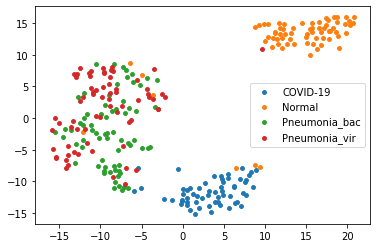

In [15]:
from sklearn.manifold import TSNE

intermediate_layer_model = models.Model(inputs=model.input,
                                        outputs=model.get_layer('feature_dense').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")

raise NotImplementedError("Extract features from the tsne_data_generator and fit a t-SNE model for the features,"
                          "and plot the resulting 2D features of the four classes.")

## Attempt 2: Revising the vgg16 model with additional layers

#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [106]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False
model = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(125, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5), loss = 'categorical_crossentropy', 
              metrics = ['categorical_accuracy'])

In [107]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_25 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_76 (Dense)             (None, 500)               12544500  
_________________________________________________________________
dropout_49 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 125)               62625     
_________________________________________________________________
dropout_50 (Dropout)         (None, 125)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 4)               

#### [5 points] Train Model

In [108]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

    
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size



res = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, \
          validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

22
6
Epoch 1/100
21/21 [==============================] - 16s 730ms/step - loss: 1.5256 - categorical_accuracy: 0.2571 - val_loss: 1.3473 - val_categorical_accuracy: 0.2800
Epoch 2/100
21/21 [==============================] - 15s 736ms/step - loss: 1.3996 - categorical_accuracy: 0.2864 - val_loss: 1.3457 - val_categorical_accuracy: 0.4400
Epoch 3/100
21/21 [==============================] - 15s 737ms/step - loss: 1.3743 - categorical_accuracy: 0.3058 - val_loss: 1.2964 - val_categorical_accuracy: 0.4400
Epoch 4/100
21/21 [==============================] - 17s 793ms/step - loss: 1.3410 - categorical_accuracy: 0.3495 - val_loss: 1.2727 - val_categorical_accuracy: 0.4000
Epoch 5/100
21/21 [==============================] - 17s 788ms/step - loss: 1.3080 - categorical_accuracy: 0.3952 - val_loss: 1.2660 - val_categorical_accuracy: 0.4000
Epoch 6/100
21/21 [==============================] - 16s 776ms/step - loss: 1.3034 - categorical_accuracy: 0.3738 - val_loss: 1.1904 - val_categorical_accu

21/21 [==============================] - 18s 865ms/step - loss: 0.7459 - categorical_accuracy: 0.6408 - val_loss: 0.7188 - val_categorical_accuracy: 0.6600
Epoch 50/100
21/21 [==============================] - 16s 750ms/step - loss: 0.8010 - categorical_accuracy: 0.6748 - val_loss: 0.9118 - val_categorical_accuracy: 0.5200
Epoch 51/100
21/21 [==============================] - 17s 810ms/step - loss: 0.7472 - categorical_accuracy: 0.6796 - val_loss: 0.7118 - val_categorical_accuracy: 0.6600
Epoch 52/100
21/21 [==============================] - 18s 832ms/step - loss: 0.8241 - categorical_accuracy: 0.6381 - val_loss: 0.8619 - val_categorical_accuracy: 0.6000
Epoch 53/100
21/21 [==============================] - 18s 868ms/step - loss: 0.8229 - categorical_accuracy: 0.6456 - val_loss: 0.8276 - val_categorical_accuracy: 0.6200
Epoch 54/100
21/21 [==============================] - 17s 820ms/step - loss: 0.8040 - categorical_accuracy: 0.6952 - val_loss: 0.7786 - val_categorical_accuracy: 0.6400

21/21 [==============================] - 16s 764ms/step - loss: 0.6542 - categorical_accuracy: 0.7282 - val_loss: 0.6764 - val_categorical_accuracy: 0.6600
Epoch 98/100
21/21 [==============================] - 16s 747ms/step - loss: 0.6859 - categorical_accuracy: 0.7379 - val_loss: 0.6319 - val_categorical_accuracy: 0.7400
Epoch 99/100
21/21 [==============================] - 16s 748ms/step - loss: 0.6761 - categorical_accuracy: 0.7330 - val_loss: 0.7390 - val_categorical_accuracy: 0.6600
Epoch 100/100
21/21 [==============================] - 16s 759ms/step - loss: 0.7077 - categorical_accuracy: 0.6845 - val_loss: 0.6197 - val_categorical_accuracy: 0.7200


#### [5 points] Plot Accuracy and Loss During Training

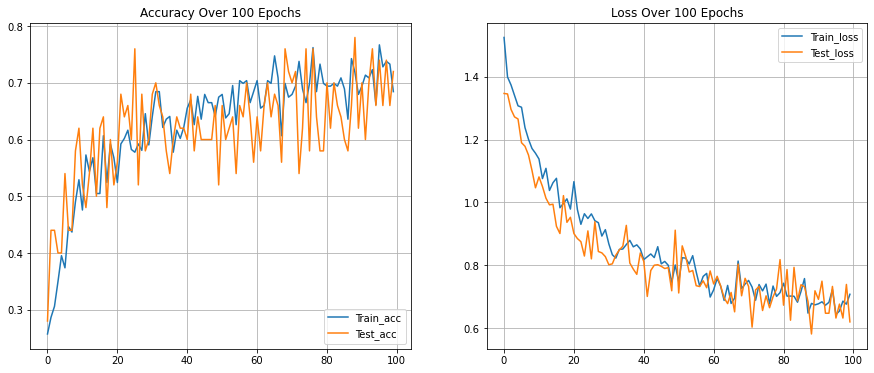

In [111]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1.plot(res.history['categorical_accuracy'])
ax1.plot(res.history['val_categorical_accuracy'])
ax1.set_title('Accuracy Over ' + str(NUM_EPOCHS) + ' Epochs')
ax1.legend(['Train_acc', 'Test_acc'], loc='lower right')
ax1.grid(True)
ax2.set_title('Loss Over ' + str(NUM_EPOCHS) + ' Epochs')
ax2.plot(res.history['loss'])
ax2.plot(res.history['val_loss'])
ax2.legend(['Train_loss', 'Test_loss'], loc='upper right')
ax2.grid(True)
plt.show()

#### Testing Model

In [112]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 3s 82ms/step - loss: 0.8460 - categorical_accuracy: 0.6389
Test loss: 0.8460082411766052
Test accuracy: 0.6388888955116272


## Attempt 3: Try generating more fake data with data augmentation

#### Generate Training and Validation Batches

In [115]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [123]:
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg16.trainable = False
model = tf.keras.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [124]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_29 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_85 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_86 (Dense)             (None, 4)                 516       
Total params: 17,926,596
Trainable params: 3,211,908
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [125]:
#FIT MODEL

    
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

NUM_EPOCHS = 500

res = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch = STEP_SIZE_TRAIN, \
         validation_data=valid_batches, validation_steps= STEP_SIZE_VALID)

Epoch 1/500
21/21 [==============================] - 15s 694ms/step - loss: 1.4142 - categorical_accuracy: 0.2961 - val_loss: 1.3821 - val_categorical_accuracy: 0.2200
Epoch 2/500
21/21 [==============================] - 14s 647ms/step - loss: 1.3580 - categorical_accuracy: 0.3398 - val_loss: 1.3469 - val_categorical_accuracy: 0.3000
Epoch 3/500
21/21 [==============================] - 13s 641ms/step - loss: 1.2848 - categorical_accuracy: 0.4029 - val_loss: 1.2987 - val_categorical_accuracy: 0.5200
Epoch 4/500
21/21 [==============================] - 14s 643ms/step - loss: 1.2616 - categorical_accuracy: 0.4078 - val_loss: 1.2541 - val_categorical_accuracy: 0.4200
Epoch 5/500
21/21 [==============================] - 14s 642ms/step - loss: 1.2389 - categorical_accuracy: 0.4126 - val_loss: 1.2271 - val_categorical_accuracy: 0.4800
Epoch 6/500
21/21 [==============================] - 14s 643ms/step - loss: 1.1970 - categorical_accuracy: 0.5291 - val_loss: 1.1538 - val_categorical_accuracy:

21/21 [==============================] - 14s 656ms/step - loss: 0.7235 - categorical_accuracy: 0.6942 - val_loss: 0.8031 - val_categorical_accuracy: 0.6200
Epoch 50/500
21/21 [==============================] - 14s 663ms/step - loss: 0.7546 - categorical_accuracy: 0.7233 - val_loss: 0.7603 - val_categorical_accuracy: 0.6800
Epoch 51/500
21/21 [==============================] - 14s 663ms/step - loss: 0.7368 - categorical_accuracy: 0.7136 - val_loss: 0.7727 - val_categorical_accuracy: 0.6200
Epoch 52/500
21/21 [==============================] - 14s 653ms/step - loss: 0.7649 - categorical_accuracy: 0.6990 - val_loss: 0.8109 - val_categorical_accuracy: 0.6400
Epoch 53/500
21/21 [==============================] - 14s 653ms/step - loss: 0.7345 - categorical_accuracy: 0.7087 - val_loss: 0.7407 - val_categorical_accuracy: 0.6600
Epoch 54/500
21/21 [==============================] - 14s 657ms/step - loss: 0.7229 - categorical_accuracy: 0.7427 - val_loss: 0.7707 - val_categorical_accuracy: 0.6400

21/21 [==============================] - 14s 649ms/step - loss: 0.6481 - categorical_accuracy: 0.7476 - val_loss: 0.7072 - val_categorical_accuracy: 0.6600
Epoch 98/500
21/21 [==============================] - 14s 650ms/step - loss: 0.6418 - categorical_accuracy: 0.7767 - val_loss: 0.6805 - val_categorical_accuracy: 0.6600
Epoch 99/500
21/21 [==============================] - 14s 663ms/step - loss: 0.6507 - categorical_accuracy: 0.7330 - val_loss: 0.6660 - val_categorical_accuracy: 0.7200
Epoch 100/500
21/21 [==============================] - 14s 655ms/step - loss: 0.6485 - categorical_accuracy: 0.7233 - val_loss: 0.7528 - val_categorical_accuracy: 0.6400
Epoch 101/500
21/21 [==============================] - 14s 648ms/step - loss: 0.6363 - categorical_accuracy: 0.7816 - val_loss: 0.7405 - val_categorical_accuracy: 0.6000
Epoch 102/500
21/21 [==============================] - 14s 656ms/step - loss: 0.6138 - categorical_accuracy: 0.7427 - val_loss: 0.6523 - val_categorical_accuracy: 0.6

21/21 [==============================] - 14s 658ms/step - loss: 0.5516 - categorical_accuracy: 0.8301 - val_loss: 0.6749 - val_categorical_accuracy: 0.6800
Epoch 146/500
21/21 [==============================] - 14s 673ms/step - loss: 0.6239 - categorical_accuracy: 0.7282 - val_loss: 0.6150 - val_categorical_accuracy: 0.7400
Epoch 147/500
21/21 [==============================] - 14s 651ms/step - loss: 0.5487 - categorical_accuracy: 0.7961 - val_loss: 0.6319 - val_categorical_accuracy: 0.7400
Epoch 148/500
21/21 [==============================] - 14s 664ms/step - loss: 0.6007 - categorical_accuracy: 0.7767 - val_loss: 0.7328 - val_categorical_accuracy: 0.6400
Epoch 149/500
21/21 [==============================] - 14s 653ms/step - loss: 0.5800 - categorical_accuracy: 0.7427 - val_loss: 0.7503 - val_categorical_accuracy: 0.5600
Epoch 150/500
21/21 [==============================] - 14s 654ms/step - loss: 0.5695 - categorical_accuracy: 0.7864 - val_loss: 0.6920 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 658ms/step - loss: 0.5761 - categorical_accuracy: 0.7621 - val_loss: 0.7220 - val_categorical_accuracy: 0.6400
Epoch 194/500
21/21 [==============================] - 14s 667ms/step - loss: 0.5112 - categorical_accuracy: 0.8204 - val_loss: 0.7089 - val_categorical_accuracy: 0.7400
Epoch 195/500
21/21 [==============================] - 14s 656ms/step - loss: 0.5674 - categorical_accuracy: 0.7864 - val_loss: 0.6131 - val_categorical_accuracy: 0.7000
Epoch 196/500
21/21 [==============================] - 14s 657ms/step - loss: 0.5370 - categorical_accuracy: 0.7476 - val_loss: 0.6436 - val_categorical_accuracy: 0.7200
Epoch 197/500
21/21 [==============================] - 14s 655ms/step - loss: 0.5572 - categorical_accuracy: 0.7913 - val_loss: 0.6058 - val_categorical_accuracy: 0.6800
Epoch 198/500
21/21 [==============================] - 14s 667ms/step - loss: 0.4922 - categorical_accuracy: 0.8058 - val_loss: 0.6343 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 652ms/step - loss: 0.4954 - categorical_accuracy: 0.8155 - val_loss: 0.6402 - val_categorical_accuracy: 0.6800
Epoch 242/500
21/21 [==============================] - 14s 656ms/step - loss: 0.5785 - categorical_accuracy: 0.7913 - val_loss: 0.6338 - val_categorical_accuracy: 0.6800
Epoch 243/500
21/21 [==============================] - 14s 651ms/step - loss: 0.5340 - categorical_accuracy: 0.8155 - val_loss: 0.6196 - val_categorical_accuracy: 0.7000
Epoch 244/500
21/21 [==============================] - 14s 652ms/step - loss: 0.5076 - categorical_accuracy: 0.8252 - val_loss: 0.6101 - val_categorical_accuracy: 0.6600
Epoch 245/500
21/21 [==============================] - 14s 662ms/step - loss: 0.5081 - categorical_accuracy: 0.8095 - val_loss: 0.7619 - val_categorical_accuracy: 0.6400
Epoch 246/500
21/21 [==============================] - 14s 655ms/step - loss: 0.5036 - categorical_accuracy: 0.8155 - val_loss: 0.6658 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 654ms/step - loss: 0.5461 - categorical_accuracy: 0.7816 - val_loss: 0.6878 - val_categorical_accuracy: 0.7200
Epoch 290/500
21/21 [==============================] - 14s 652ms/step - loss: 0.5039 - categorical_accuracy: 0.8301 - val_loss: 0.5696 - val_categorical_accuracy: 0.7400
Epoch 291/500
21/21 [==============================] - 14s 654ms/step - loss: 0.5283 - categorical_accuracy: 0.8155 - val_loss: 0.6663 - val_categorical_accuracy: 0.6400
Epoch 292/500
21/21 [==============================] - 14s 656ms/step - loss: 0.4875 - categorical_accuracy: 0.7913 - val_loss: 0.6057 - val_categorical_accuracy: 0.7200
Epoch 293/500
21/21 [==============================] - 14s 656ms/step - loss: 0.4966 - categorical_accuracy: 0.8204 - val_loss: 0.6093 - val_categorical_accuracy: 0.6400
Epoch 294/500
21/21 [==============================] - 14s 659ms/step - loss: 0.4530 - categorical_accuracy: 0.8204 - val_loss: 0.6500 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 666ms/step - loss: 0.5206 - categorical_accuracy: 0.7762 - val_loss: 0.6865 - val_categorical_accuracy: 0.7200
Epoch 338/500
21/21 [==============================] - 14s 658ms/step - loss: 0.4429 - categorical_accuracy: 0.8689 - val_loss: 0.5472 - val_categorical_accuracy: 0.7200
Epoch 339/500
21/21 [==============================] - 14s 656ms/step - loss: 0.5013 - categorical_accuracy: 0.7816 - val_loss: 0.6250 - val_categorical_accuracy: 0.6600
Epoch 340/500
21/21 [==============================] - 14s 654ms/step - loss: 0.4698 - categorical_accuracy: 0.8010 - val_loss: 0.6550 - val_categorical_accuracy: 0.6600
Epoch 341/500
21/21 [==============================] - 14s 654ms/step - loss: 0.5016 - categorical_accuracy: 0.7864 - val_loss: 0.6339 - val_categorical_accuracy: 0.7800
Epoch 342/500
21/21 [==============================] - 14s 658ms/step - loss: 0.4721 - categorical_accuracy: 0.8301 - val_loss: 0.6384 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 665ms/step - loss: 0.4283 - categorical_accuracy: 0.8333 - val_loss: 0.6953 - val_categorical_accuracy: 0.6800
Epoch 386/500
21/21 [==============================] - 14s 656ms/step - loss: 0.4661 - categorical_accuracy: 0.8495 - val_loss: 0.5890 - val_categorical_accuracy: 0.7800
Epoch 387/500
21/21 [==============================] - 14s 657ms/step - loss: 0.4999 - categorical_accuracy: 0.8204 - val_loss: 0.6029 - val_categorical_accuracy: 0.7000
Epoch 388/500
21/21 [==============================] - 14s 657ms/step - loss: 0.4637 - categorical_accuracy: 0.8398 - val_loss: 0.8315 - val_categorical_accuracy: 0.6600
Epoch 389/500
21/21 [==============================] - 14s 656ms/step - loss: 0.4311 - categorical_accuracy: 0.8204 - val_loss: 0.6658 - val_categorical_accuracy: 0.7000
Epoch 390/500
21/21 [==============================] - 14s 655ms/step - loss: 0.4736 - categorical_accuracy: 0.8350 - val_loss: 0.6861 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 658ms/step - loss: 0.4459 - categorical_accuracy: 0.8252 - val_loss: 0.7191 - val_categorical_accuracy: 0.6800
Epoch 434/500
21/21 [==============================] - 14s 658ms/step - loss: 0.4337 - categorical_accuracy: 0.8204 - val_loss: 0.6177 - val_categorical_accuracy: 0.7200
Epoch 435/500
21/21 [==============================] - 14s 658ms/step - loss: 0.4366 - categorical_accuracy: 0.8058 - val_loss: 0.6694 - val_categorical_accuracy: 0.7000
Epoch 436/500
21/21 [==============================] - 14s 661ms/step - loss: 0.4196 - categorical_accuracy: 0.8544 - val_loss: 0.6664 - val_categorical_accuracy: 0.7200
Epoch 437/500
21/21 [==============================] - 14s 660ms/step - loss: 0.4490 - categorical_accuracy: 0.8204 - val_loss: 0.5099 - val_categorical_accuracy: 0.7600
Epoch 438/500
21/21 [==============================] - 14s 662ms/step - loss: 0.4459 - categorical_accuracy: 0.8447 - val_loss: 0.6506 - val_categorical_accuracy: 0

21/21 [==============================] - 14s 661ms/step - loss: 0.3886 - categorical_accuracy: 0.8495 - val_loss: 0.6396 - val_categorical_accuracy: 0.7200
Epoch 482/500
21/21 [==============================] - 14s 659ms/step - loss: 0.4430 - categorical_accuracy: 0.8350 - val_loss: 0.6812 - val_categorical_accuracy: 0.7200
Epoch 483/500
21/21 [==============================] - 14s 657ms/step - loss: 0.4275 - categorical_accuracy: 0.8350 - val_loss: 0.6431 - val_categorical_accuracy: 0.7200
Epoch 484/500
21/21 [==============================] - 14s 658ms/step - loss: 0.4867 - categorical_accuracy: 0.7816 - val_loss: 0.6852 - val_categorical_accuracy: 0.6600
Epoch 485/500
21/21 [==============================] - 14s 675ms/step - loss: 0.4550 - categorical_accuracy: 0.8544 - val_loss: 0.6087 - val_categorical_accuracy: 0.7600
Epoch 486/500
21/21 [==============================] - 14s 660ms/step - loss: 0.4209 - categorical_accuracy: 0.8350 - val_loss: 0.6606 - val_categorical_accuracy: 0

#### [5 points] Plot Accuracy and Loss During Training

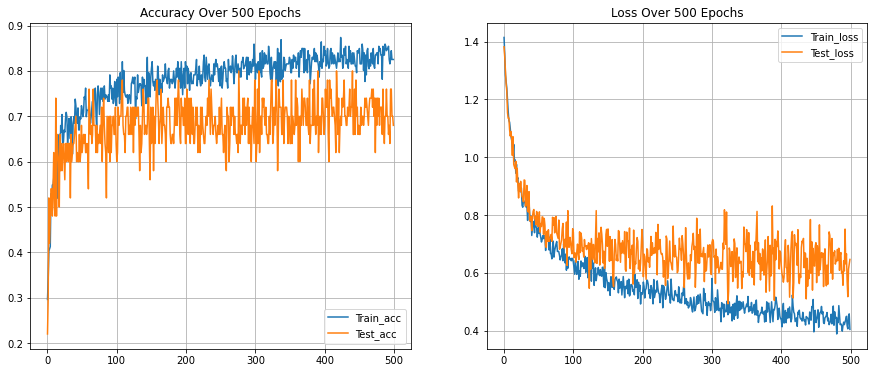

In [126]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1.plot(res.history['categorical_accuracy'])
ax1.plot(res.history['val_categorical_accuracy'])
ax1.set_title('Accuracy Over ' + str(NUM_EPOCHS) + ' Epochs')
ax1.legend(['Train_acc', 'Test_acc'], loc='lower right')
ax1.grid(True)
ax2.set_title('Loss Over ' + str(NUM_EPOCHS) + ' Epochs')
ax2.plot(res.history['loss'])
ax2.plot(res.history['val_loss'])
ax2.legend(['Train_loss', 'Test_loss'], loc='upper right')
ax2.grid(True)
plt.show()

#### Testing Model

In [127]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 3s 69ms/step - loss: 0.7342 - categorical_accuracy: 0.6944
Test loss: 0.7342052459716797
Test accuracy: 0.6944444179534912


# Model 2: AlexNet

#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [128]:
# from https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=1e-7), metrics=['categorical_accuracy'])

In [129]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_50 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_51 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 12, 12, 384)     

#### [5 points] Train Model

In [ ]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

    
STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

NUM_EPOCHS = 100


res = model.fit(train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, \
          validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

22
6
Epoch 1/100
21/21 [==============================] - 8s 374ms/step - loss: 3.2500 - categorical_accuracy: 0.2476 - val_loss: 1.4232 - val_categorical_accuracy: 0.2600
Epoch 2/100
21/21 [==============================] - 8s 371ms/step - loss: 3.0390 - categorical_accuracy: 0.2718 - val_loss: 1.4285 - val_categorical_accuracy: 0.2600
Epoch 3/100
21/21 [==============================] - 8s 370ms/step - loss: 3.2938 - categorical_accuracy: 0.2476 - val_loss: 1.4257 - val_categorical_accuracy: 0.2600
Epoch 4/100
21/21 [==============================] - 8s 375ms/step - loss: 3.0958 - categorical_accuracy: 0.2718 - val_loss: 1.4125 - val_categorical_accuracy: 0.2800
Epoch 5/100
21/21 [==============================] - 8s 374ms/step - loss: 3.0334 - categorical_accuracy: 0.2573 - val_loss: 1.4218 - val_categorical_accuracy: 0.2800
Epoch 6/100
21/21 [==============================] - 8s 376ms/step - loss: 3.2283 - categorical_accuracy: 0.2087 - val_loss: 1.4867 - val_categorical_accuracy: 

Epoch 50/100
21/21 [==============================] - 8s 374ms/step - loss: 2.8737 - categorical_accuracy: 0.2427 - val_loss: 1.5835 - val_categorical_accuracy: 0.2800
Epoch 51/100
21/21 [==============================] - 8s 373ms/step - loss: 2.8583 - categorical_accuracy: 0.2427 - val_loss: 1.4519 - val_categorical_accuracy: 0.3400
Epoch 52/100
21/21 [==============================] - 8s 373ms/step - loss: 3.1376 - categorical_accuracy: 0.2379 - val_loss: 1.6366 - val_categorical_accuracy: 0.2800
Epoch 53/100
21/21 [==============================] - 8s 373ms/step - loss: 2.9074 - categorical_accuracy: 0.2330 - val_loss: 1.5327 - val_categorical_accuracy: 0.3000
Epoch 54/100
21/21 [==============================] - 8s 369ms/step - loss: 2.7461 - categorical_accuracy: 0.2718 - val_loss: 1.6341 - val_categorical_accuracy: 0.3000
Epoch 55/100
21/21 [==============================] - 8s 371ms/step - loss: 2.8589 - categorical_accuracy: 0.1990 - val_loss: 1.3422 - val_categorical_accuracy:

#### [5 points] Plot Accuracy and Loss During Training

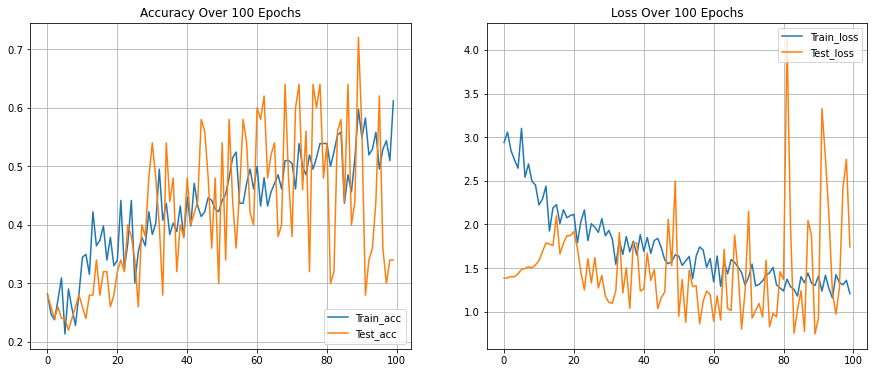

In [70]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax1.plot(res.history['categorical_accuracy'])
ax1.plot(res.history['val_categorical_accuracy'])
ax1.set_title('Accuracy Over ' + str(NUM_EPOCHS) + ' Epochs')
ax1.legend(['Train_acc', 'Test_acc'], loc='lower right')
ax1.grid(True)
ax2.set_title('Loss Over ' + str(NUM_EPOCHS) + ' Epochs')
ax2.plot(res.history['loss'])
ax2.plot(res.history['val_loss'])
ax2.legend(['Train_loss', 'Test_loss'], loc='upper right')
ax2.grid(True)
plt.show()

#### Testing Model

In [66]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 1s 23ms/step - loss: 1.9850 - categorical_accuracy: 0.5278
Test loss: 1.9850109815597534
Test accuracy: 0.5277777910232544


<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->